In [158]:
from utils import (
    np,
    t,
    deepcopy,
)

from utils import (
    norm_1_vec,
    norm_1,
    norm_2_vec,
    norm_2,
    norm_3_vec,
    norm_3,
    norm_spectral,
)

import matplotlib.pyplot as plt
import seaborn as sns


# вариант 15. Онбаев Бауржан

# Решение СЛАУ. Ax = y

In [134]:
# 15 вариант
A = np.array(
    [
        [0.17, -0.13, -0.11, -0.12],
        [1.0, -1.0, -0.13, 0.13],
        [0.35, 0.33, 0.12, 0.13],
        [0.13, 0.11, -0.13, -0.11],
    ]
)
x_init = np.full(4, 0.).reshape(-1, 1)
y = np.array([0.22, 0.11, 0.12, 1.0]).reshape(-1, 1)


In [203]:
# вариант 13 Диана
A = np.array(
    [
        [0.18, 2.11, 0.13, -0.22],
        [0.33, -0.22, -1.0, 0.17],
        [-1.0, 0.11, 2.0, -0.45],
        [7.0, -0.17, -0.22, 0.33],
    ]
)
x_init = np.full(4, 0.0).reshape(-1, 1)
y = np.array([0.22, 0.11, 1, 0.21]).reshape(-1, 1)


In [204]:
print("A matrix", A, sep="\n", end="\n" * 2)
print("y vector", y, sep="\n", end="\n" * 2)
print("x_init vector", x_init, sep="\n")


A matrix
[[ 0.18  2.11  0.13 -0.22]
 [ 0.33 -0.22 -1.    0.17]
 [-1.    0.11  2.   -0.45]
 [ 7.   -0.17 -0.22  0.33]]

y vector
[[0.22]
 [0.11]
 [1.  ]
 [0.21]]

x_init vector
[[0.]
 [0.]
 [0.]
 [0.]]


## точное решение через обратную матрицу

In [205]:
print("x = A^-1 @ y")
print("x = ")
exact_result_x = np.linalg.inv(A) @ y
print(exact_result_x)


x = A^-1 @ y
x = 
[[ 0.42598613]
 [-0.86580504]
 [-1.44667779]
 [-9.81017837]]


In [206]:
print("exact solution x", A @ exact_result_x, sep="\n", end="\n" * 2)
print("y vector", y, sep="\n", end="\n" * 2)


exact solution x
[[0.22]
 [0.11]
 [1.  ]
 [0.21]]

y vector
[[0.22]
 [0.11]
 [1.  ]
 [0.21]]



## Метод простых итераций

In [207]:
def sim(A, x_init, y):
    x = deepcopy(x_init)


## 2-ой вариант метода Зейделя

Переменные, нужные для 2-го варианта метода Зейделя, которые мы можем сразу посчитать, чтобы не пересчитывать в цикле.

In [208]:
A1 = np.tril(A)
A2 = A - A1
A_ = -np.linalg.inv(A1) @ A2
a_ = np.linalg.inv(A1) @ y


In [209]:
def zm2_iter(A_, x_init, a_):
    return A_ @ x_init + a_


def count_norms(A):
    norm_func_collection = [norm_1, norm_2, norm_3]
    norm_values = [norm_func_collection[i](A) for i in range(len(norm_func_collection))]
    for i, value in enumerate(norm_values):
        print(f"{i+1}-ая норма: {value}")
    return np.array(norm_values)


Проверяем сходимость 2-го варианта метода Зейделя (достаточное условие)

In [210]:
q_collection = count_norms(A_)


1-ая норма: 272.83982552800734
2-ая норма: 270.532015993266
3-ая норма: 238.90817334270065


In [212]:
norms = [[] for i in range(3)]

x = deepcopy(x_init)

iterations = int(1e1)
for _ in range(iterations):
    x_ = deepcopy(x)
    x = zm2_iter(A_, x, a_)
    norms[0].append(norm_1_vec(x - x_))
    norms[1].append(norm_2_vec(x - x_))
    norms[2].append(norm_3_vec(x - x_))


In [213]:
for i in range(3):
    print(
        f"{i+1}-ая норма между последними 2-мя приближениями x = {round(norms[i][-1], 2)}"
    )


1-ая норма между последними 2-мя приближениями x = 2.1156181253461056e+16
2-ая норма между последними 2-мя приближениями x = 2.4736093813122676e+16
3-ая норма между последними 2-мя приближениями x = 2.1282940676693268e+16


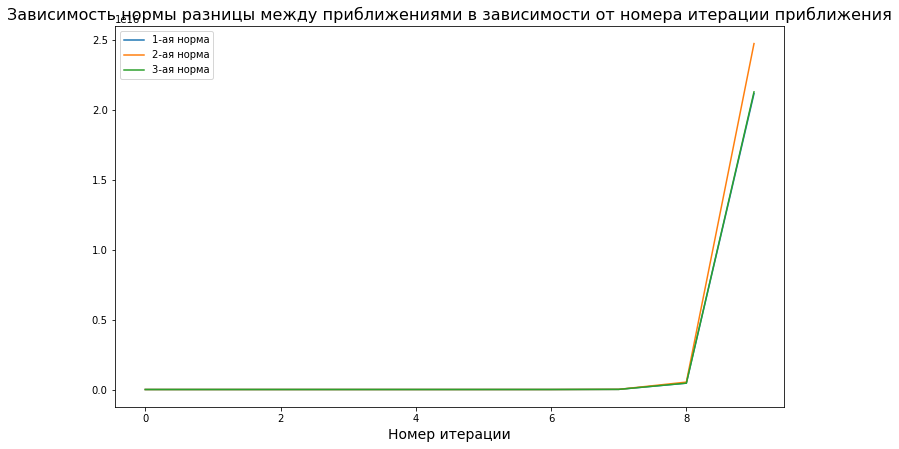

In [215]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(iterations)), y=norms[0], label="1-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[1], label="2-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[2], label="3-ая норма")
plt.title(
    "Зависимость нормы разницы между приближениями в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()


## Метод градиентного спуска

In [217]:
def grad_descent_iteration(A, x, b):
    grad = b - A @ x
    lr = np.sum(grad * grad) / np.sum(grad * (A @ grad))
    return x + lr * grad


In [218]:
# если b окажется 0, то градиент полностью занулится и мы не сможем сдвинуться с места вовсе
x = np.random.rand(4).reshape(-1, 1)
norms = [[] for i in range(3)]
iterations = int(1e2)
for _ in range(iterations):
    x = grad_descent_iteration(A, x, y)
    norms[0].append(norm_1_vec(x - y))
    norms[1].append(norm_2_vec(x - y))
    norms[2].append(norm_3_vec(x - y))


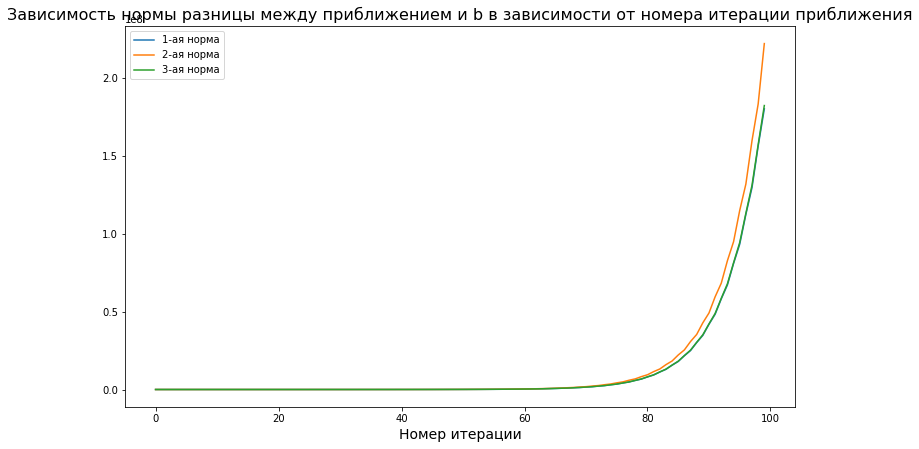

In [219]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(range(iterations)), y=norms[0], label="1-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[1], label="2-ая норма")
sns.lineplot(x=list(range(iterations)), y=norms[2], label="3-ая норма")
plt.title(
    "Зависимость нормы разницы между приближением и b в зависимости от номера итерации приближения",
    fontsize=16,
)
plt.xlabel("Номер итерации", fontsize=14)
plt.show()
